# 配置环境

In [1]:
!pip install openmim mmengine

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 51 kB 22.8 MB/s eta 0:00:01
     |████████████████████████████████| 331 kB 46.0 MB/s eta 0:00:01
     |████████████████████████████████| 239 kB 65.5 MB/s eta 0:00:01
     |████████████████████████████████| 84 kB 47.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 64.4 MB/s eta 0:00:01
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.10.0
    Uninstalling Pygments-2.10.0:
      Successfully uninstalled Pygments-2.10.0


In [2]:
!mim install  mmcv-full mmcls

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.10.0/index.html
     |████████████████████████████████| 58.2 MB 8.3 MB/s eta 0:00:014     |███████████████████████         | 42.0 MB 6.6 MB/s eta 0:00:03     |████████████████████████▉       | 45.1 MB 6.6 MB/s eta 0:00:03     |█████████████████████████████   | 52.8 MB 5.1 MB/s eta 0:00:02
     |████████████████████████████████| 648 kB 19.8 MB/s eta 0:00:01


## 验证是否下载成功

In [3]:
import mmcv
import mmcls

/environment/miniconda3/lib/python3.7/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  'On January 1, 2023, MMCV will release v2.0.0, in which it will remove '


提示有最新版本可以使用，但是不影响后续使用

# OpenMMlab项目中的重要概念

## 配置文件

**深度学习模型**的训练涉及几个方面：

− 模型结构 模型有几层、每层多少通道数等等

− 数据集 用什么数据训练模型：数据集划分、数据文件路径、数据增强策略等等

− 训练策略 梯度下降算法、学习率参数、batch_size、训练总轮次、学习率变化策略等等

− 运行时 GPU、分布式环境配置等等

− 一些辅助功能 如打印日志、定时保存checkpoint等等

在 OpenMMLab 项目中，所有这些项目都涵盖在一个配置文件中，一个配置文件定义了一个完整的训练
过程

− model 字段定义模型

− data 字段定义数据

− optimizer、lr_config 等字段定义训练策略

− load_from 字段定义与训练模型的参数文件

**mim**除了可以用来管理下载的包，也可以用来下载OpenMMlab模型

## 下载一个训练好的模型

!mim download mmcls --config [模型文件的名字不带.py后缀] --dest[存放位置] .表示下载到本地

In [13]:
!mim download mmcls --config mobilenet-v2_8xb32_in1k --dest .

processing mobilenet-v2_8xb32_in1k...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MiB 4.8 MB/s eta 0:00:0000:0100:01
Successfully downloaded mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth to /home/featurize/work/OpenMMlab_AI_2023.2/run
Successfully dumped mobilenet-v2_8xb32_in1k.py to /home/featurize/work/OpenMMlab_AI_2023.2/run


下载完成获得两个文件

1. .pth的参数文件

2. .py的配置文件

打开.py的配置文件我们可以看到:

1. model部分记载了模型相关的内容，比如num-classes表示最终分类的类别数量，以及输出如channel和
损失函数的定义

2. data部分记载了我们的数据的一些存放路径、加载方式、数据增强等等，当前的模型我们可以看到他是基
于ImageNet数据集做的预训练

3. 后面的train/val/test分别对应了训练集/验证集/测试集相关的数据处理方式

4. 再往下就是优化器相关的内容


# 简单推导示例

使用mmcls库中的**api函数**即可实现

In [4]:
from mmcls.apis import init_model, inference_model

注意这里的路径要和自己的对应比如自己的模型下载在上层文件就需要../

In [5]:
model = init_model('mobilenet-v2_8xb32_in1k.py',
                  'mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth',
                  device='cuda:0')

load checkpoint from local path: mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth


/environment/miniconda3/lib/python3.7/site-packages/mmcls/apis/inference.py:45: UserWarning: Class names are not saved in the checkpoint's meta data, use imagenet by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


In [6]:
# 模型类型，类似nn.Module的子类
type(model)

mmcls.models.classifiers.image.ImageClassifier

In [19]:
# 模型结构
model

ImageClassifier(
  (backbone): MobileNetV2(
    (conv1): ConvModule(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activate): ReLU6(inplace=True)
    )
    (layer1): Sequential(
      (0): InvertedResidual(
        (conv): Sequential(
          (0): ConvModule(
            (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (activate): ReLU6(inplace=True)
          )
          (1): ConvModule(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
      )
    )
    (layer2): Sequential(
      (0): InvertedResidual(
        (conv): Sequential(
     

推理使用**inference_model函数**，

In [7]:
# 推理
result = inference_model(model, 'strawberry.jpg')

In [8]:
# 预测结果以字典形式存储
result

{'pred_label': 949,
 'pred_score': 0.9991908669471741,
 'pred_class': 'strawberry'}

## 将结果写在图片上

In [9]:
from mmcls.apis import show_result_pyplot

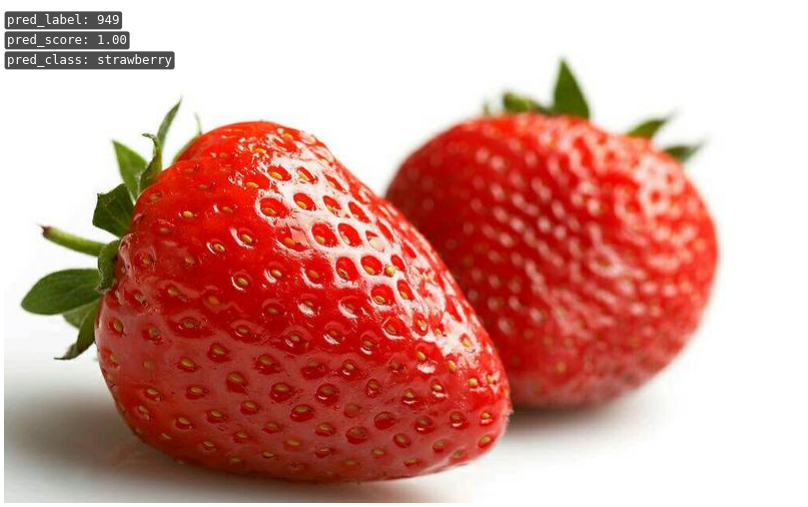

In [10]:
show_result_pyplot(model, 'strawberry.jpg', result)

基本原理和自己手写pytorch全流程是一样的，只不过mmcls对pytorch做了封装，我们实际执行代码更少量

实战营视频3的27:40~31:00讲解了推理的内部全流程（我们调api背后的事情）

b站视频主页：https://space.bilibili.com/1293512903/channel/collectiondetail?sid=1068652

# 训练

数据集导入，这里我们直接下载子豪兄完成训练集、测试集划分的数据集和未完成划分的数据集

In [32]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/fruit30/fruit30_split.zip

--2023-02-04 11:59:50--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/fruit30/fruit30_split.zip
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 226278151 (216M) [application/zip]
正在保存至: “fruit30_split.zip”

fruit30_split.zip   100%[===================>] 215.79M  25.0MB/s    用时 9.6s    

2023-02-04 12:00:00 (22.5 MB/s) - 已保存 “fruit30_split.zip” [226278151/226278151])



In [28]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/fruit81/fruit81_full.zip

--2023-02-04 11:52:50--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/fruit81/fruit81_full.zip
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 724936499 (691M) [application/zip]
正在保存至: “fruit81_full.zip”

fruit81_full.zip    100%[===================>] 691.35M  28.2MB/s    用时 22s     

2023-02-04 11:53:13 (30.7 MB/s) - 已保存 “fruit81_full.zip” [724936499/724936499])



解压缩，用data文件夹存放数据，>> /dev/null表示不生成解压过程记录

方便起见我们直接使用划分完成的，未划分的数据集也可以留着自己完成数据集划分

In [29]:
mkdir data

In [34]:
!unzip ./fruit30_split.zip -d ./data>> /dev/null

## 预训练模型

仍然使用上面提到的在ImageNet中预训练的模型mobilenet-v2_8xb32_in1k

修改配置文件：将数据集路径等等更换成我们需要的内容

首先使用cp指令复制一个.py的配置文件用来修改自己的

In [35]:
!cp mobilenet-v2_8xb32_in1k.py cls-0-pytorch.py 

手动打开配置文件之后我们会看到部分内容，其实就是中间变量，后续执行data部分的时候也会自动包含在里面，所以直接删除即可

In [37]:
# 删除cls-0-pytorch.py中这一部分
dataset_type = 'ImageNet'
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='RandomResizedCrop', size=224, backend='pillow'),
    dict(type='RandomFlip', flip_prob=0.5, direction='horizontal'),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=True),
    dict(type='ImageToTensor', keys=['img']),
    dict(type='ToTensor', keys=['gt_label']),
    dict(type='Collect', keys=['img', 'gt_label'])
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', size=(256, -1), backend='pillow'),
    dict(type='CenterCrop', crop_size=224),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=True),
    dict(type='ImageToTensor', keys=['img']),
    dict(type='Collect', keys=['img'])
]

## 修改配置文件

修改model部分：使用的模型不需要修改，只需要修改分类头的数量（num_classes）

由于我们是继承自模型在ImageNet上的训练结果来做fine-tune微调，所以我们需要将load_from = None修改为我们下载的参数文件的路径，放在配置文件里（原始的配置及文件在最下面，放到哪里都可以，有就行）

In [41]:
model = dict(
    type='ImageClassifier',
    backbone=dict(type='MobileNetV2', widen_factor=1.0),
    neck=dict(type='GlobalAveragePooling'),
    head=dict(
        type='LinearClsHead',
        num_classes=30,
        in_channels=1280,
        loss=dict(type='CrossEntropyLoss', loss_weight=1.0),
        topk=(1, 5)))
load_from = 'mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth'

修改data部分：

1. 首先我们不是在ImageNet上去训练，所以通常需要把type改成CustomDataset

2. 配置路径为自己当前的路径，通常OpenMMlab数据都放在一个data文件路径下

    eg.当前就是data/fruit30_split/train

3. 数据增强部分通常不用变化，但是需要一个ann_file（配置文件里有就加上没有就算了）表示我们数据处理中的一些类别标注存到一个文件中，没有的话默认就会按照文件的默认文件结构去推断。

4. 注意路径需要在train/val/test中都修改。ann_file如果自己的数据集中没有提前生成，就直接删掉即可。

In [19]:
data = dict(
    samples_per_gpu=32,
    workers_per_gpu=2,
    train=dict(
        type='CustomDataset',
        data_prefix='data/fruit30_split/train',
        pipeline=[
            dict(type='LoadImageFromFile'),
            dict(type='RandomResizedCrop', size=224, backend='pillow'),
            dict(type='RandomFlip', flip_prob=0.5, direction='horizontal'),
            dict(
                type='Normalize',
                mean=[123.675, 116.28, 103.53],
                std=[58.395, 57.12, 57.375],
                to_rgb=True),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='ToTensor', keys=['gt_label']),
            dict(type='Collect', keys=['img', 'gt_label'])
        ]),
    val=dict(
        type='CustomDataset',
        data_prefix='data/fruit30_split/val',
        pipeline=[
            dict(type='LoadImageFromFile'),
            dict(type='Resize', size=(256, -1), backend='pillow'),
            dict(type='CenterCrop', crop_size=224),
            dict(
                type='Normalize',
                mean=[123.675, 116.28, 103.53],
                std=[58.395, 57.12, 57.375],
                to_rgb=True),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img'])
        ]),
    test=dict(
        type='CustomDataset',
        data_prefix='data/fruit30_split/val',
        pipeline=[
            dict(type='LoadImageFromFile'),
            dict(type='Resize', size=(256, -1), backend='pillow'),
            dict(type='CenterCrop', crop_size=224),
            dict(
                type='Normalize',
                mean=[123.675, 116.28, 103.53],
                std=[58.395, 57.12, 57.375],
                to_rgb=True),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img'])
        ]))

修改配置文件最下面优化器相关内容：由于我们的训练在1卡，而模型参数中的是8卡，所以我们需要将学习率/8

    eg. 原来lr = 0.045，现在就要变成lr = 0.045/8 ≈ 0.005

max_epochs也不用很大

checkpoint_config每隔多少次保存一次模型，这里我们一共5轮，只存一次即可

log_config日志输出可以调的小一点，输出频繁一点

其他东西整体不用改

In [24]:
evaluation = dict(interval=1, metric='accuracy')
optimizer = dict(type='SGD', lr=0.005, momentum=0.9, weight_decay=4e-05)
optimizer_config = dict(grad_clip=None)
lr_config = dict(policy='step', gamma=0.98, step=1)
runner = dict(type='EpochBasedRunner', max_epochs=5)
checkpoint_config = dict(interval=5)
log_config = dict(interval=10, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
resume_from = None
workflow = [('train', 1)]

## 将上述配置文件修改覆盖到我们cp复制的.py配置文件中

## 执行训练

使用mim工具包执行训练

In [23]:
!mim train mmcls cls-0-pytorch.py

/environment/miniconda3/lib/python3.7/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  'On January 1, 2023, MMCV will release v2.0.0, in which it will remove '
Training command is /environment/miniconda3/bin/python /environment/miniconda3/lib/python3.7/site-packages/mmcls/.mim/tools/train.py cls-0-pytorch.py --launcher none --gpus 1. 
/environment/miniconda3/lib/python3.7/site-packages/mmcv/__init__.py:21: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See ht

## 执行完成后存储的日志、checkpoint、.py配置文件、最终保存的训练参数保存在word_dirs文件路径下

# 测试刚生成的.pth参数性能

依旧使用之前测试的时候使用的api函数**inference_model**

In [27]:
from mmcls.apis import init_model, inference_model

In [28]:
model = init_model('cls-0-pytorch.py', 'work_dirs/cls-0-pytorch/latest.pth')
result = inference_model(model, 'strawberry.jpg')
print(result)

load checkpoint from local path: work_dirs/cls-0-pytorch/latest.pth
{'pred_label': 20, 'pred_score': 0.9994254112243652, 'pred_class': '草莓'}


# 喜大普奔，你已经完成了使用OpenMMlab完成一个图像分类任务的简易流程